# Birth Month Simulation

We can use the built in random choice feature of numpy to simulate non-uniformly distributed events. For instance below we consider the situation where we want to simulate the choice of a costumer at a chips shop. The costumer can chooce to have mayonaise, ketchup, curry or peanut sauce on their chips. We simulate the choice the costumer makes by assigning each choice a certain probability. 

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
X = ['mayonaise', 'ketchup', 'curry', 'peanut sauce']
p = [0.6,0.1, 0.15, 0.15]
C = np.random.choice(X,p=p)
print(C)

mayonaise


Now let's consider simulation of the birth months. So we will simulate a classroom of people together with their birth months. We use three different models for the birth months distributions. Namely, the uniform distribution over months, a uniform model over days that does not take leap days into account and a uniform model over days that does take leap days into account. 

In [10]:
Months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

puniformmonths = [1/12 for i in range(12)]

puniformnoleapdays = [31/365, 28/365, 31/365, 30/365, 31/365, 30/365, 31/365, 31/365, 30/365, 31/365, 30/365, 31/365]

puniformwithleapdays = [4*31/(4*365+1), (4*28+1)/(4*365+1), 4*31/(4*365+1), 4*30/(4*365+1), 4*31/(4*365+1), 4*30/(4*365+1), 4*31/(4*365+1), 4*31/(4*365+1), 4*30/(4*365+1), 4*31/(4*365+1), 4*30/(4*365+1), 4*31/(4*365+1)]

def class_of_people(size, model=puniformmonths):
    return np.random.choice(Months, size = size ,p=model)


Finally let's have a look at our simulated distribution. For more on plotting have a look at the visualiation chapter. Below we load our simulated data into a dataframe and subsquently plot the proportions of each model into a histogram. 

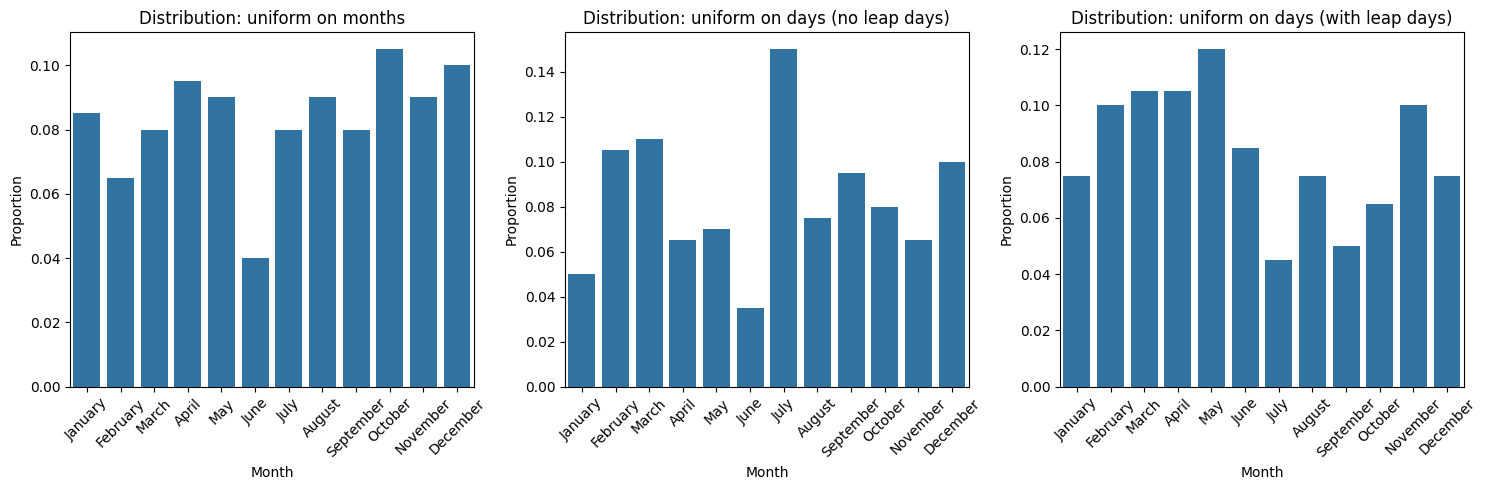

In [11]:
Simulated_uniform_months_model = class_of_people(200)
Simulated_uniform_no_leap_days_model = class_of_people(200, model =puniformnoleapdays)
Simulated_uniform_with_leap_days_model = class_of_people(200, model =puniformwithleapdays)

df_Simulated_uniform_months_model = pd.DataFrame(Simulated_uniform_months_model, columns=['Month'])
df_Simulated_uniform_no_leap_days_model = pd.DataFrame(Simulated_uniform_no_leap_days_model, columns=['Month'])
df_Simulated_uniform_with_leap_days_model = pd.DataFrame(Simulated_uniform_with_leap_days_model, columns=['Month'])


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.countplot(x='Month', data=df_Simulated_uniform_months_model, 
order=Months, stat = 'proportion')
plt.title('Distribution: uniform on months')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)


plt.subplot(1, 3, 2)
sns.countplot(x='Month', data=df_Simulated_uniform_no_leap_days_model, 
order=Months, stat = 'proportion')
plt.title('Distribution: uniform on days (no leap days)')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)


plt.subplot(1, 3, 3)
sns.countplot(x='Month', data=df_Simulated_uniform_with_leap_days_model, 
order=Months, stat = 'proportion')
plt.title('Distribution: uniform on days (with leap days)')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()